<a href="https://colab.research.google.com/github/basithh/MNIST_MLPCNN/blob/main/MNIST_MLP%26CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST WITH CNN & MLP
The MNIST dataset is an acronym that stands for the Modified National Institute of Standards and Technology dataset. It is a dataset of 60,000 small square 28×28 pixel grayscale images of handwritten single digits between 0 and 9.

In [1]:
import numpy as np
import tensorflow as tf

In [5]:
(X_train,y_train),(X_test,y_test)=tf.keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [6]:
import matplotlib.pyplot as plt

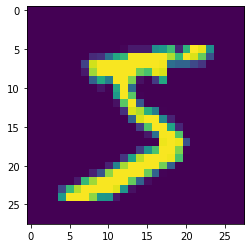

In [19]:
plt.imshow(X_train[0])

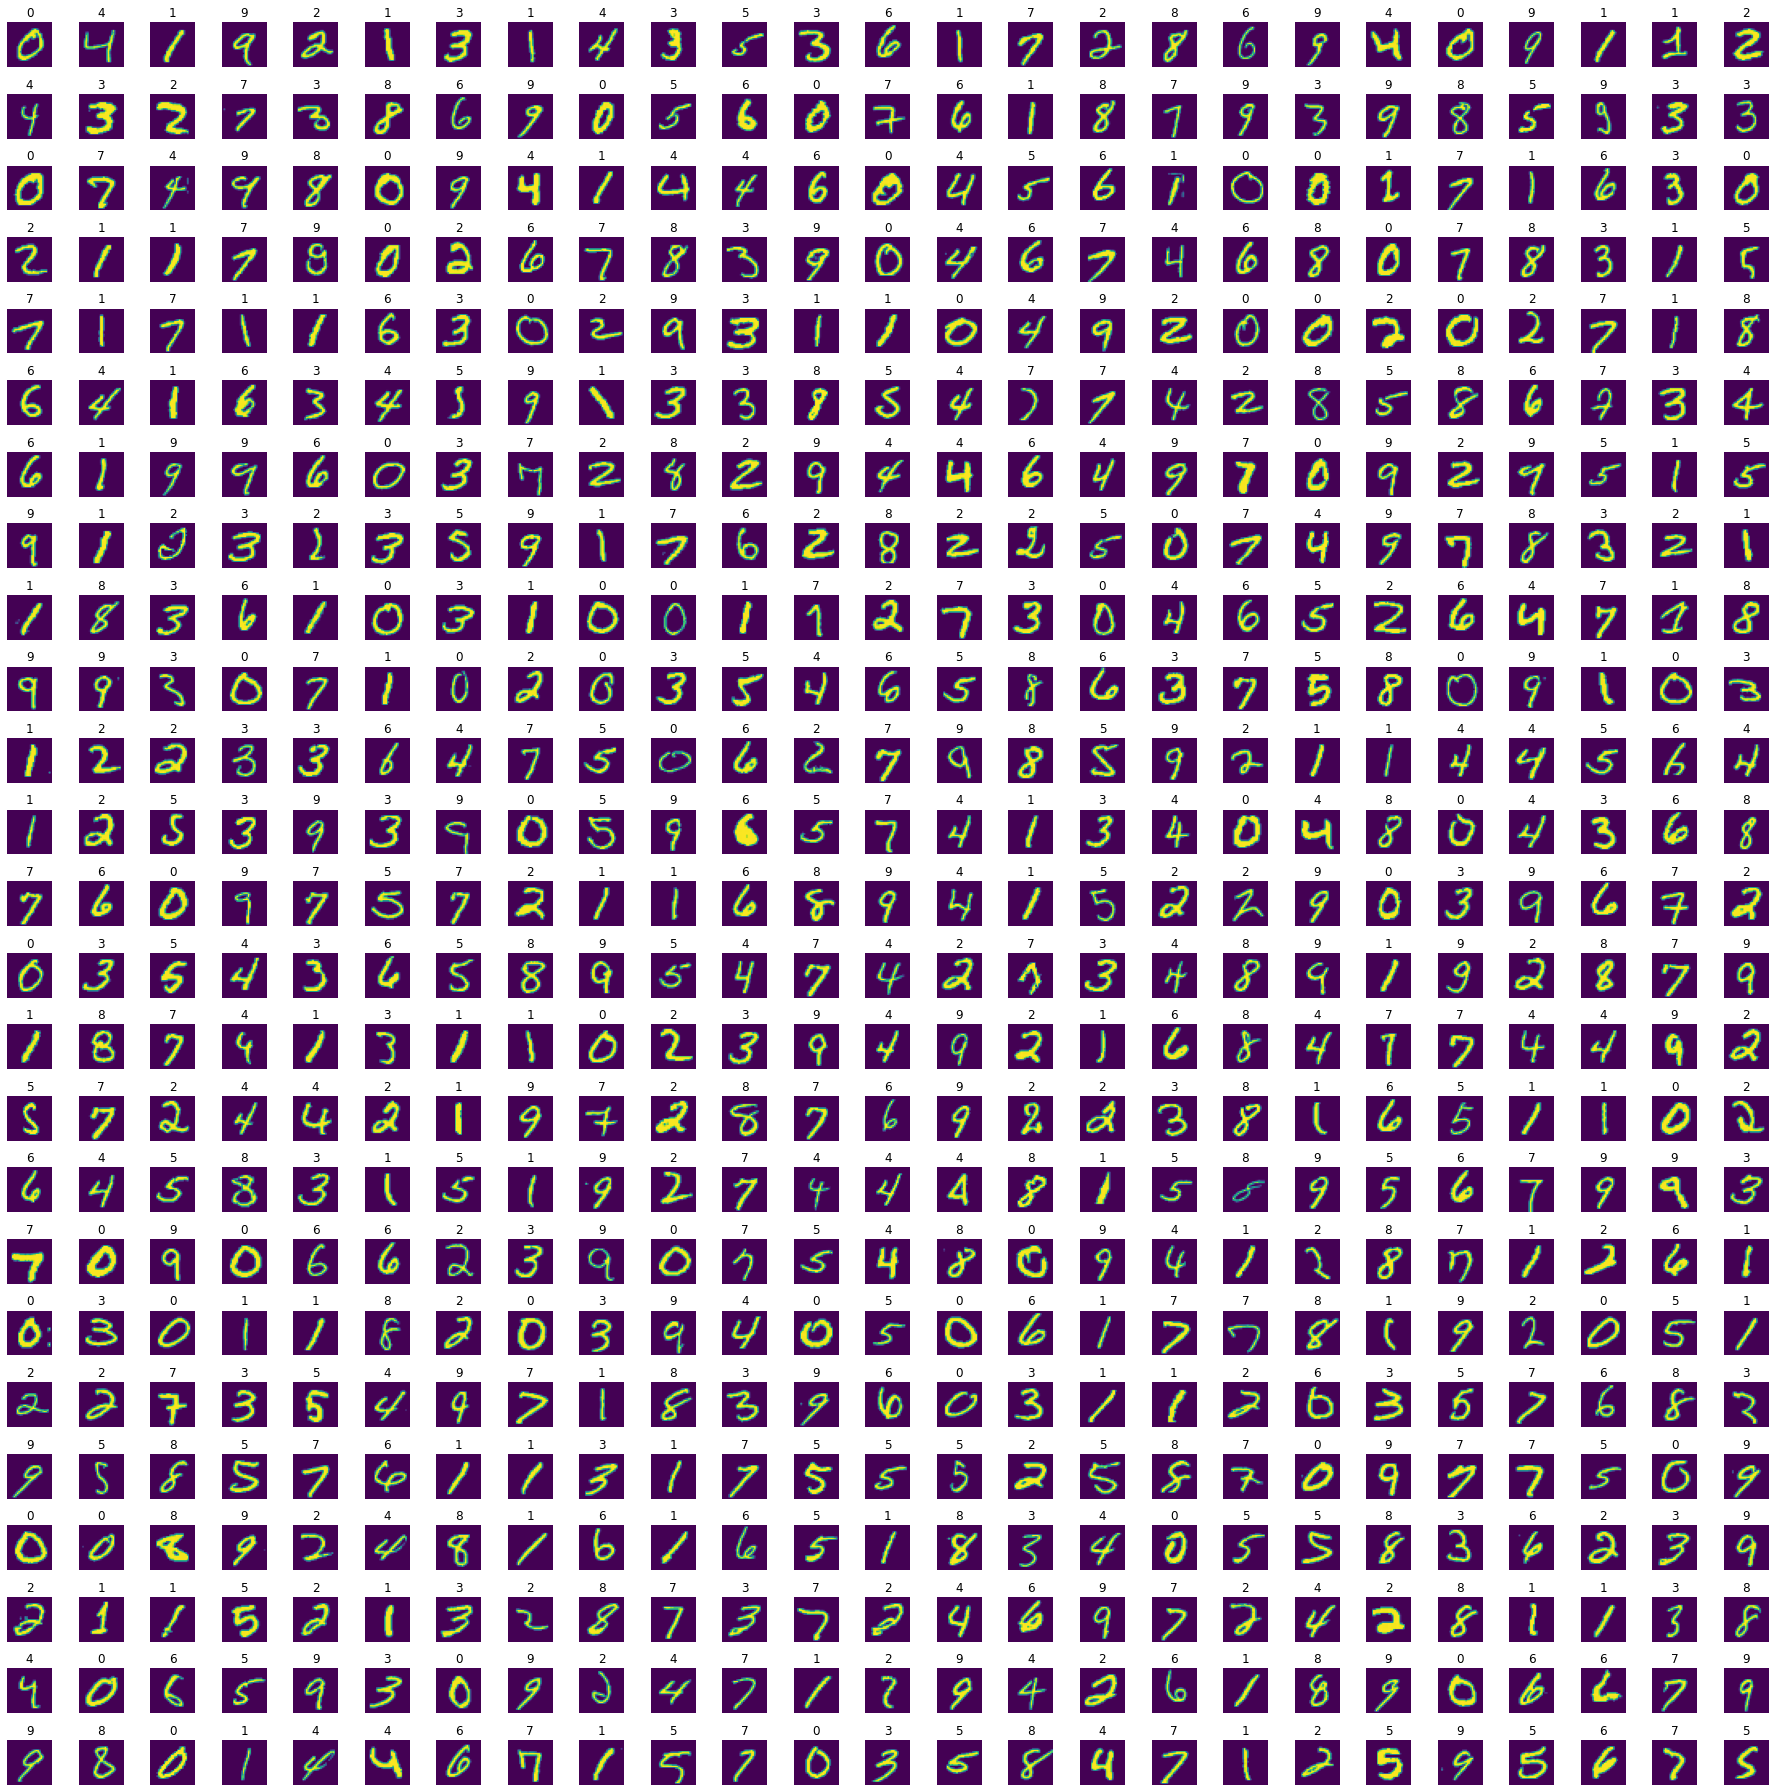

In [33]:
fig,ax = plt.subplots(25,25,figsize=(25,25))

k=0
for i in range(25):
  for j in range(25):
    k+=1
    ax[i,j].set_title(y_train[k])
    ax[i,j].imshow(X_train[k])
    ax[i,j].axis('off')
fig.tight_layout()
plt.show()

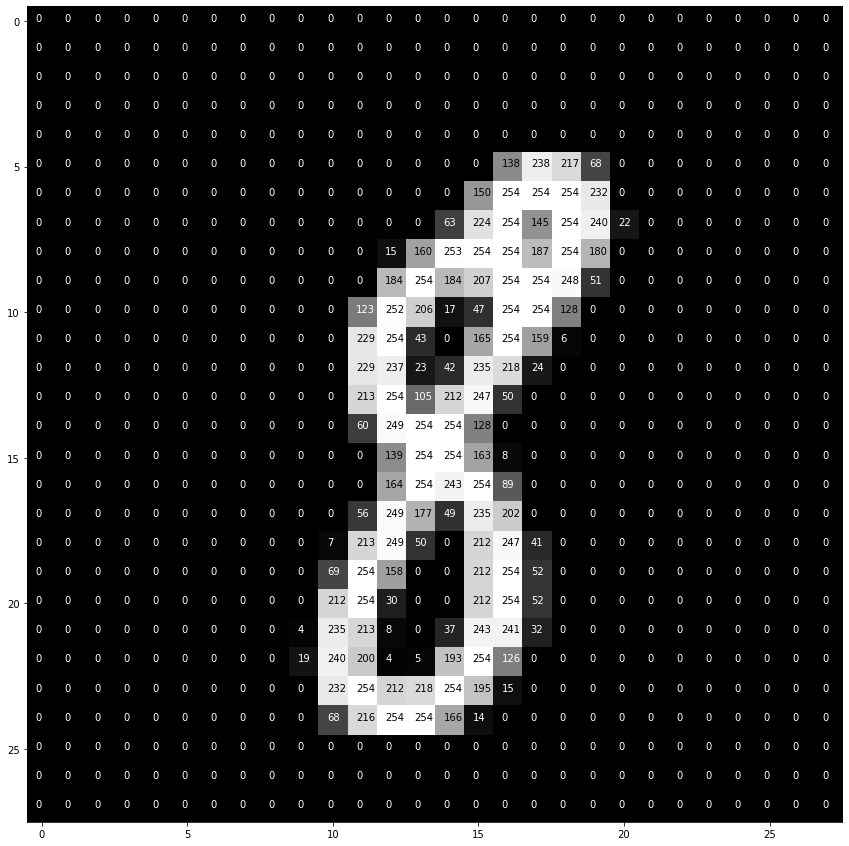

In [92]:
plt.figure(figsize=(15,15))
plt.imshow(X_train[300],cmap='gray')

for i,a in enumerate(X_train[300]):
  for j,b in enumerate(a):
    if b < 127:
      plt.text(j-0.2, i, b,color="white")
    else:
      plt.text(j-0.2, i, b)

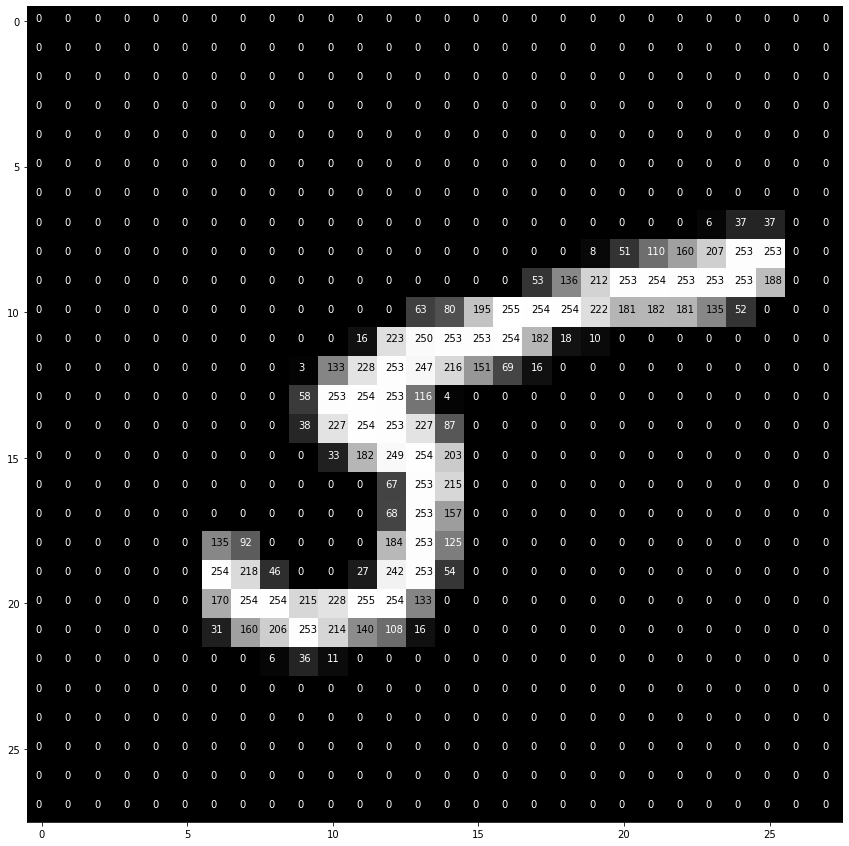

In [93]:
plt.figure(figsize=(15,15))
plt.imshow(X_train[65],cmap='gray')

for i,a in enumerate(X_train[65]):
  for j,b in enumerate(a):
    if b < 127:
      plt.text(j-0.2, i, b,color="white")
    else:
      plt.text(j-0.2, i, b)

MNIST CNN

In [94]:
# Normalisation
X_train_Normalized = X_train.astype('float32')/255
X_test_Normalized = X_test.astype('float32')/255

In [98]:
# onehot encoding
y_train_onehot = tf.one_hot(y_train,10)
y_test_onehot = tf.one_hot(y_test,10)

MLP or Without CNN

In [114]:
LAYERS = [
         tf.keras.layers.Flatten(input_shape=[28,28]),
         tf.keras.layers.Dense(60,activation='relu'),
         tf.keras.layers.Dense(30,activation='relu'),
         tf.keras.layers.Dense(10,activation='softmax'),
]

model = tf.keras.models.Sequential(LAYERS)

In [115]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 60)                47100     
_________________________________________________________________
dense_5 (Dense)              (None, 30)                1830      
_________________________________________________________________
dense_6 (Dense)              (None, 10)                310       
Total params: 49,240
Trainable params: 49,240
Non-trainable params: 0
_________________________________________________________________


In [116]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [117]:
hist_mlp = model.fit(X_train_Normalized,y_train_onehot,
          validation_data=(X_test_Normalized,y_test_onehot),
          epochs=15,
          batch_size=32)

Epoch 1/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3047 - accuracy: 0.9117 - val_loss: 0.1541 - val_accuracy: 0.9530
Epoch 2/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1420 - accuracy: 0.9570 - val_loss: 0.1317 - val_accuracy: 0.9580
Epoch 3/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1067 - accuracy: 0.9673 - val_loss: 0.1166 - val_accuracy: 0.9650
Epoch 4/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0876 - accuracy: 0.9732 - val_loss: 0.1010 - val_accuracy: 0.9695
Epoch 5/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0720 - accuracy: 0.9773 - val_loss: 0.1059 - val_accuracy: 0.9674
Epoch 6/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0608 - accuracy: 0.9811 - val_loss: 0.1075 - val_accuracy: 0.9685
Epoch 7/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0513 - accuracy: 0.9841 - val_loss: 0.1011 - val_accuracy:

Text(0.5, 1.0, 'MLP on MNIST DATASET')

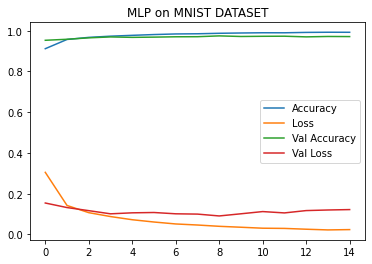

In [131]:
plt.plot(hist_mlp.history['accuracy'],label='Accuracy',marker='v')
plt.plot(hist_mlp.history['loss'],label='Loss',marker='v')
plt.plot(hist_mlp.history['val_accuracy'],label='Val Accuracy',marker='v')
plt.plot(hist_mlp.history['val_loss'],label='Val Loss',marker='v')
plt.legend()
plt.title('MLP on MNIST DATASET')

In [139]:
def valuedef(lan_no):
  num = model.predict(np.expand_dims(lan_no,axis=0))
  return np.argmax(num)

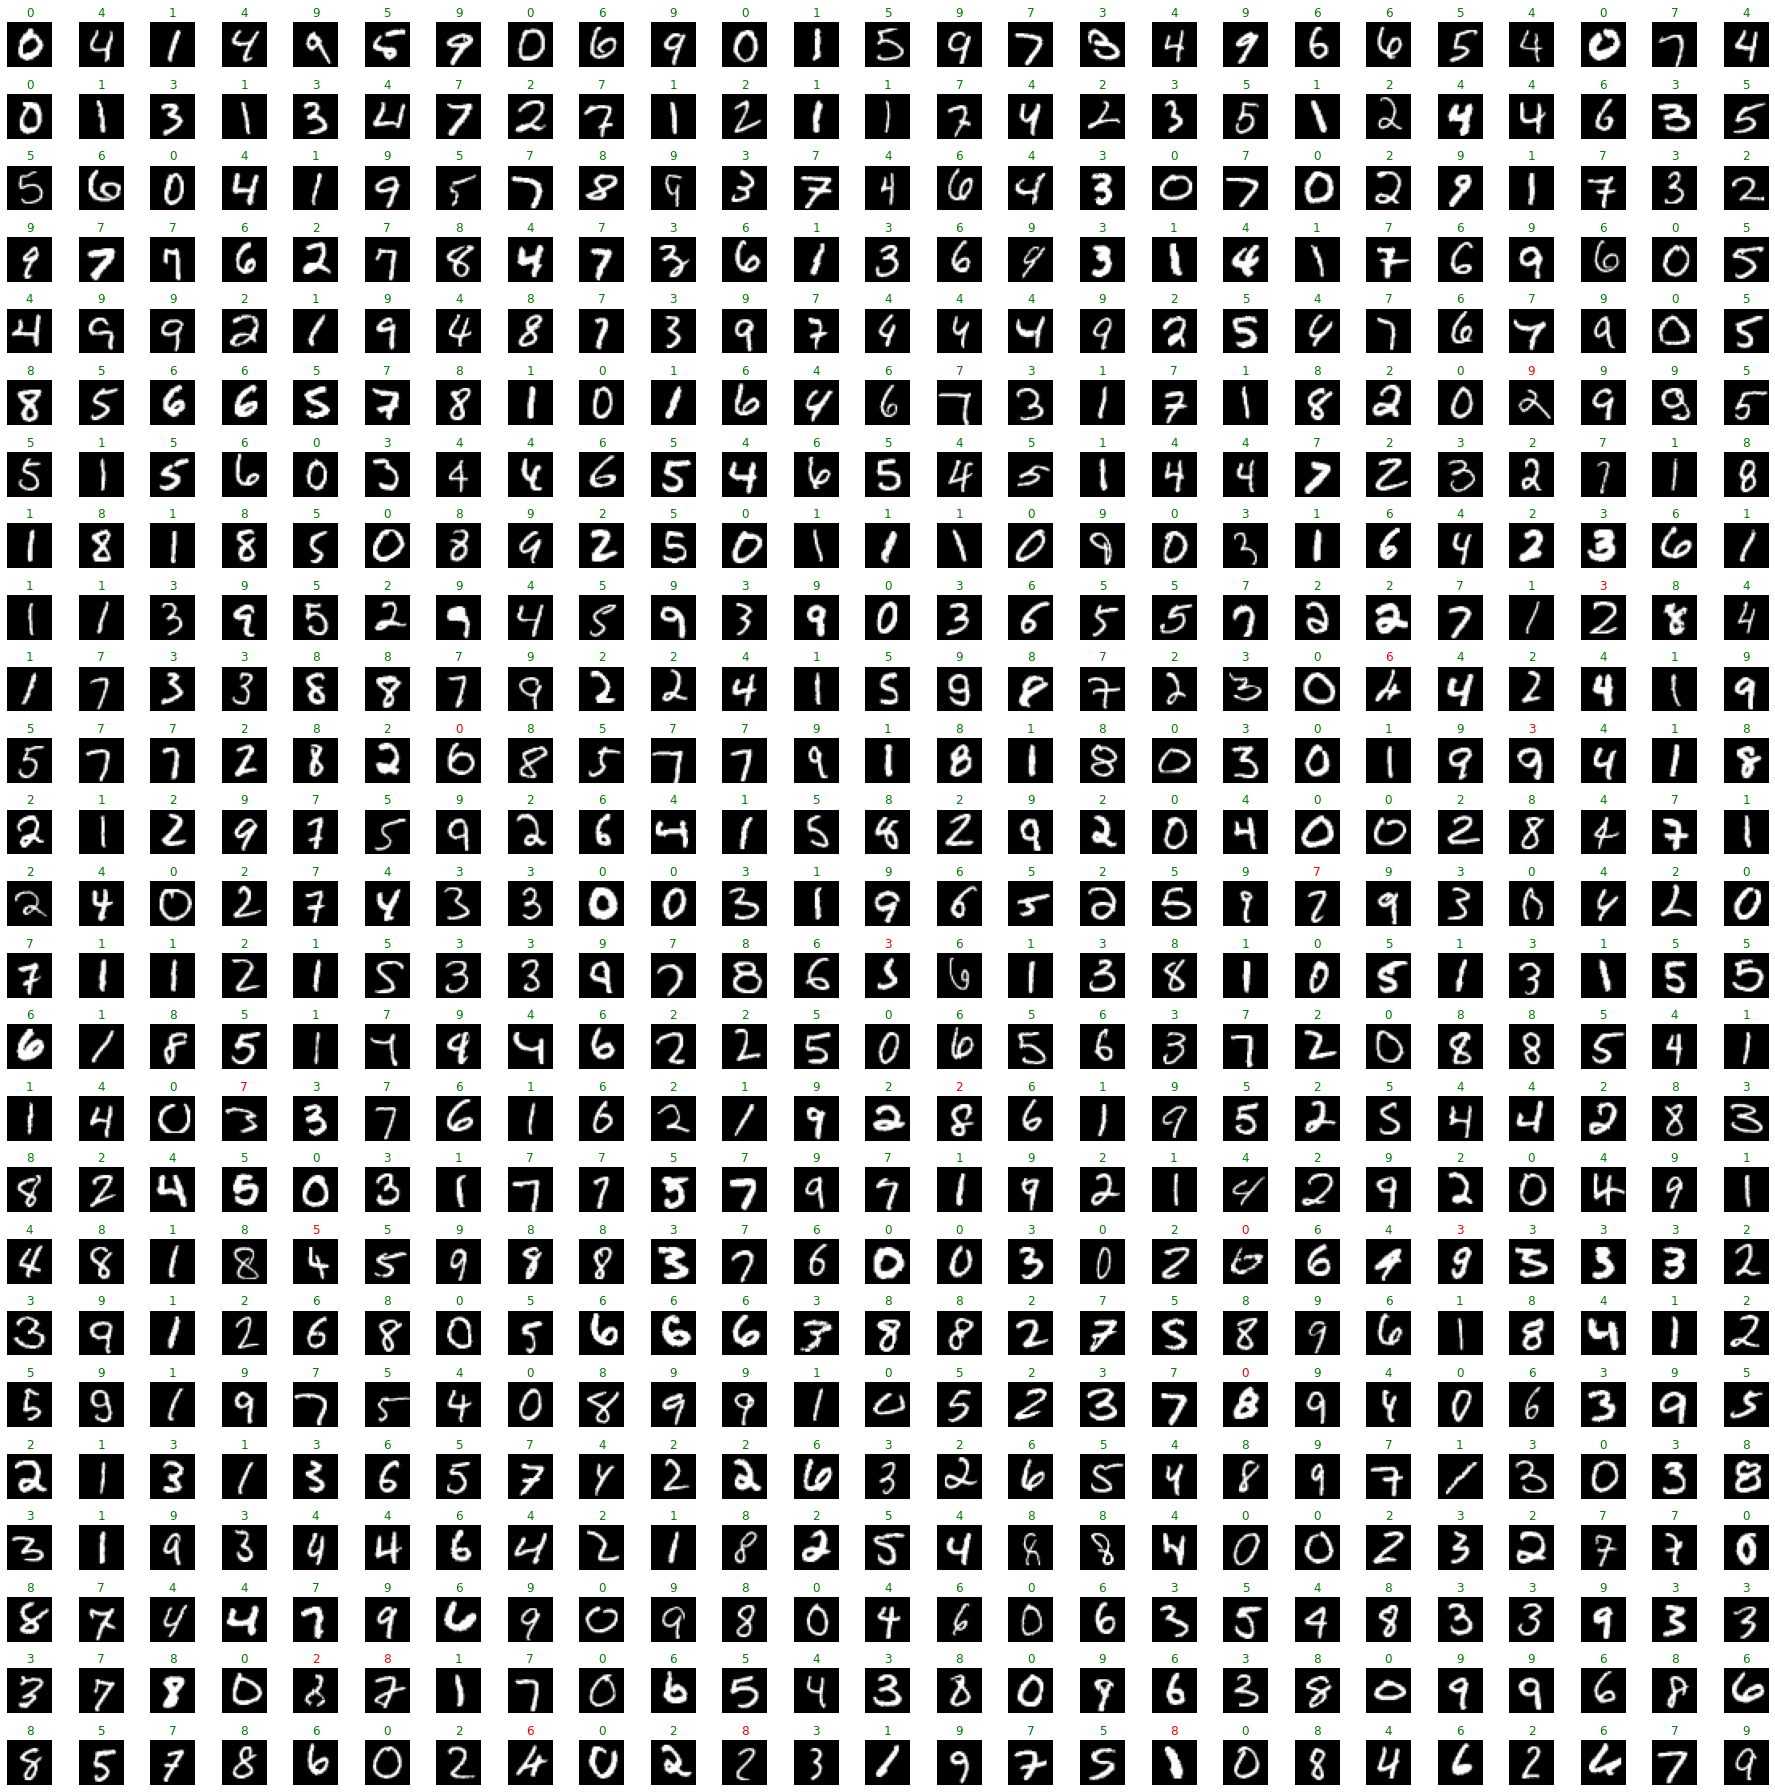

In [150]:
fig , ax = plt.subplots(25,25,figsize=(25,25))
k=3
for i in range(25):
  for j in range(25):
    ax[i,j].imshow(X_test_Normalized[k],cmap='gray')
    ax[i,j].axis('off')
    if y_test[k] == valuedef(X_test_Normalized[k]):
      ax[i,j].set_title(valuedef(X_test_Normalized[k]),color='green')
    else:
      ax[i,j].set_title(valuedef(X_test_Normalized[k]),color='red')
    k+=1
fig.tight_layout()

CNN with 2 dense layer

In [170]:
# 1D processing
X_train_Normalized_1D = X_train_Normalized.reshape(X_train.shape[0],28,28,1)
X_test_Normalized_1D = X_test_Normalized.reshape(X_test.shape[0],28,28,1)

In [171]:
LAYERS = [
          tf.keras.layers.Conv2D(32,activation='relu',kernel_size=(3, 3),padding='same',input_shape=(28,28,1)),
          tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
          tf.keras.layers.Conv2D(64,activation='relu',kernel_size=(3,3),padding='same'),
          tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
          tf.keras.layers.Flatten(),
          tf.keras.layers.Dense(30,activation='relu'),
          tf.keras.layers.Dropout(.2),
          tf.keras.layers.Dense(10,activation='softmax')
]

In [172]:
model1 = tf.keras.models.Sequential(LAYERS)

In [173]:
model1.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 30)                94110     
_________________________________________________________________
dropout_2 (Dropout)          (None, 30)               

In [174]:
model1.compile(loss='categorical_crossentropy', optimizer='adam', 
              metrics=['accuracy'])

In [175]:
hist_cnn1 = model1.fit(X_train_Normalized_1D,y_train_onehot,
          validation_data=(X_test_Normalized_1D,y_test_onehot),
          epochs=15,verbose=1, shuffle=True)

Epoch 1/15
1875/1875 [==============================] - 75s 40ms/step - loss: 0.2213 - accuracy: 0.9313 - val_loss: 0.0670 - val_accuracy: 0.9790
Epoch 2/15
1875/1875 [==============================] - 74s 39ms/step - loss: 0.0800 - accuracy: 0.9763 - val_loss: 0.0436 - val_accuracy: 0.9847
Epoch 3/15
1875/1875 [==============================] - 74s 39ms/step - loss: 0.0590 - accuracy: 0.9823 - val_loss: 0.0316 - val_accuracy: 0.9898
Epoch 4/15
1875/1875 [==============================] - 74s 39ms/step - loss: 0.0472 - accuracy: 0.9854 - val_loss: 0.0258 - val_accuracy: 0.9918
Epoch 5/15
1875/1875 [==============================] - 73s 39ms/step - loss: 0.0393 - accuracy: 0.9878 - val_loss: 0.0289 - val_accuracy: 0.9903
Epoch 6/15
1875/1875 [==============================] - 74s 39ms/step - loss: 0.0320 - accuracy: 0.9900 - val_loss: 0.0305 - val_accuracy: 0.9913
Epoch 7/15
1875/1875 [==============================] - 74s 39ms/step - loss: 0.0290 - accuracy: 0.9909 - val_loss: 0.0259 -

Text(0.5, 1.0, 'CNN on MNIST DATASET')

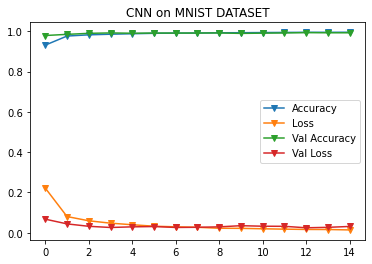

In [177]:
plt.plot(hist_cnn1.history['accuracy'],label='Accuracy',marker='v')
plt.plot(hist_cnn1.history['loss'],label='Loss',marker='v')
plt.plot(hist_cnn1.history['val_accuracy'],label='Val Accuracy',marker='v')
plt.plot(hist_cnn1.history['val_loss'],label='Val Loss',marker='v')
plt.legend()

plt.title('CNN on MNIST DATASET')

In [178]:
def valuedef1(lan_no):
  num = model1.predict(np.expand_dims(lan_no,axis=0))
  return np.argmax(num)

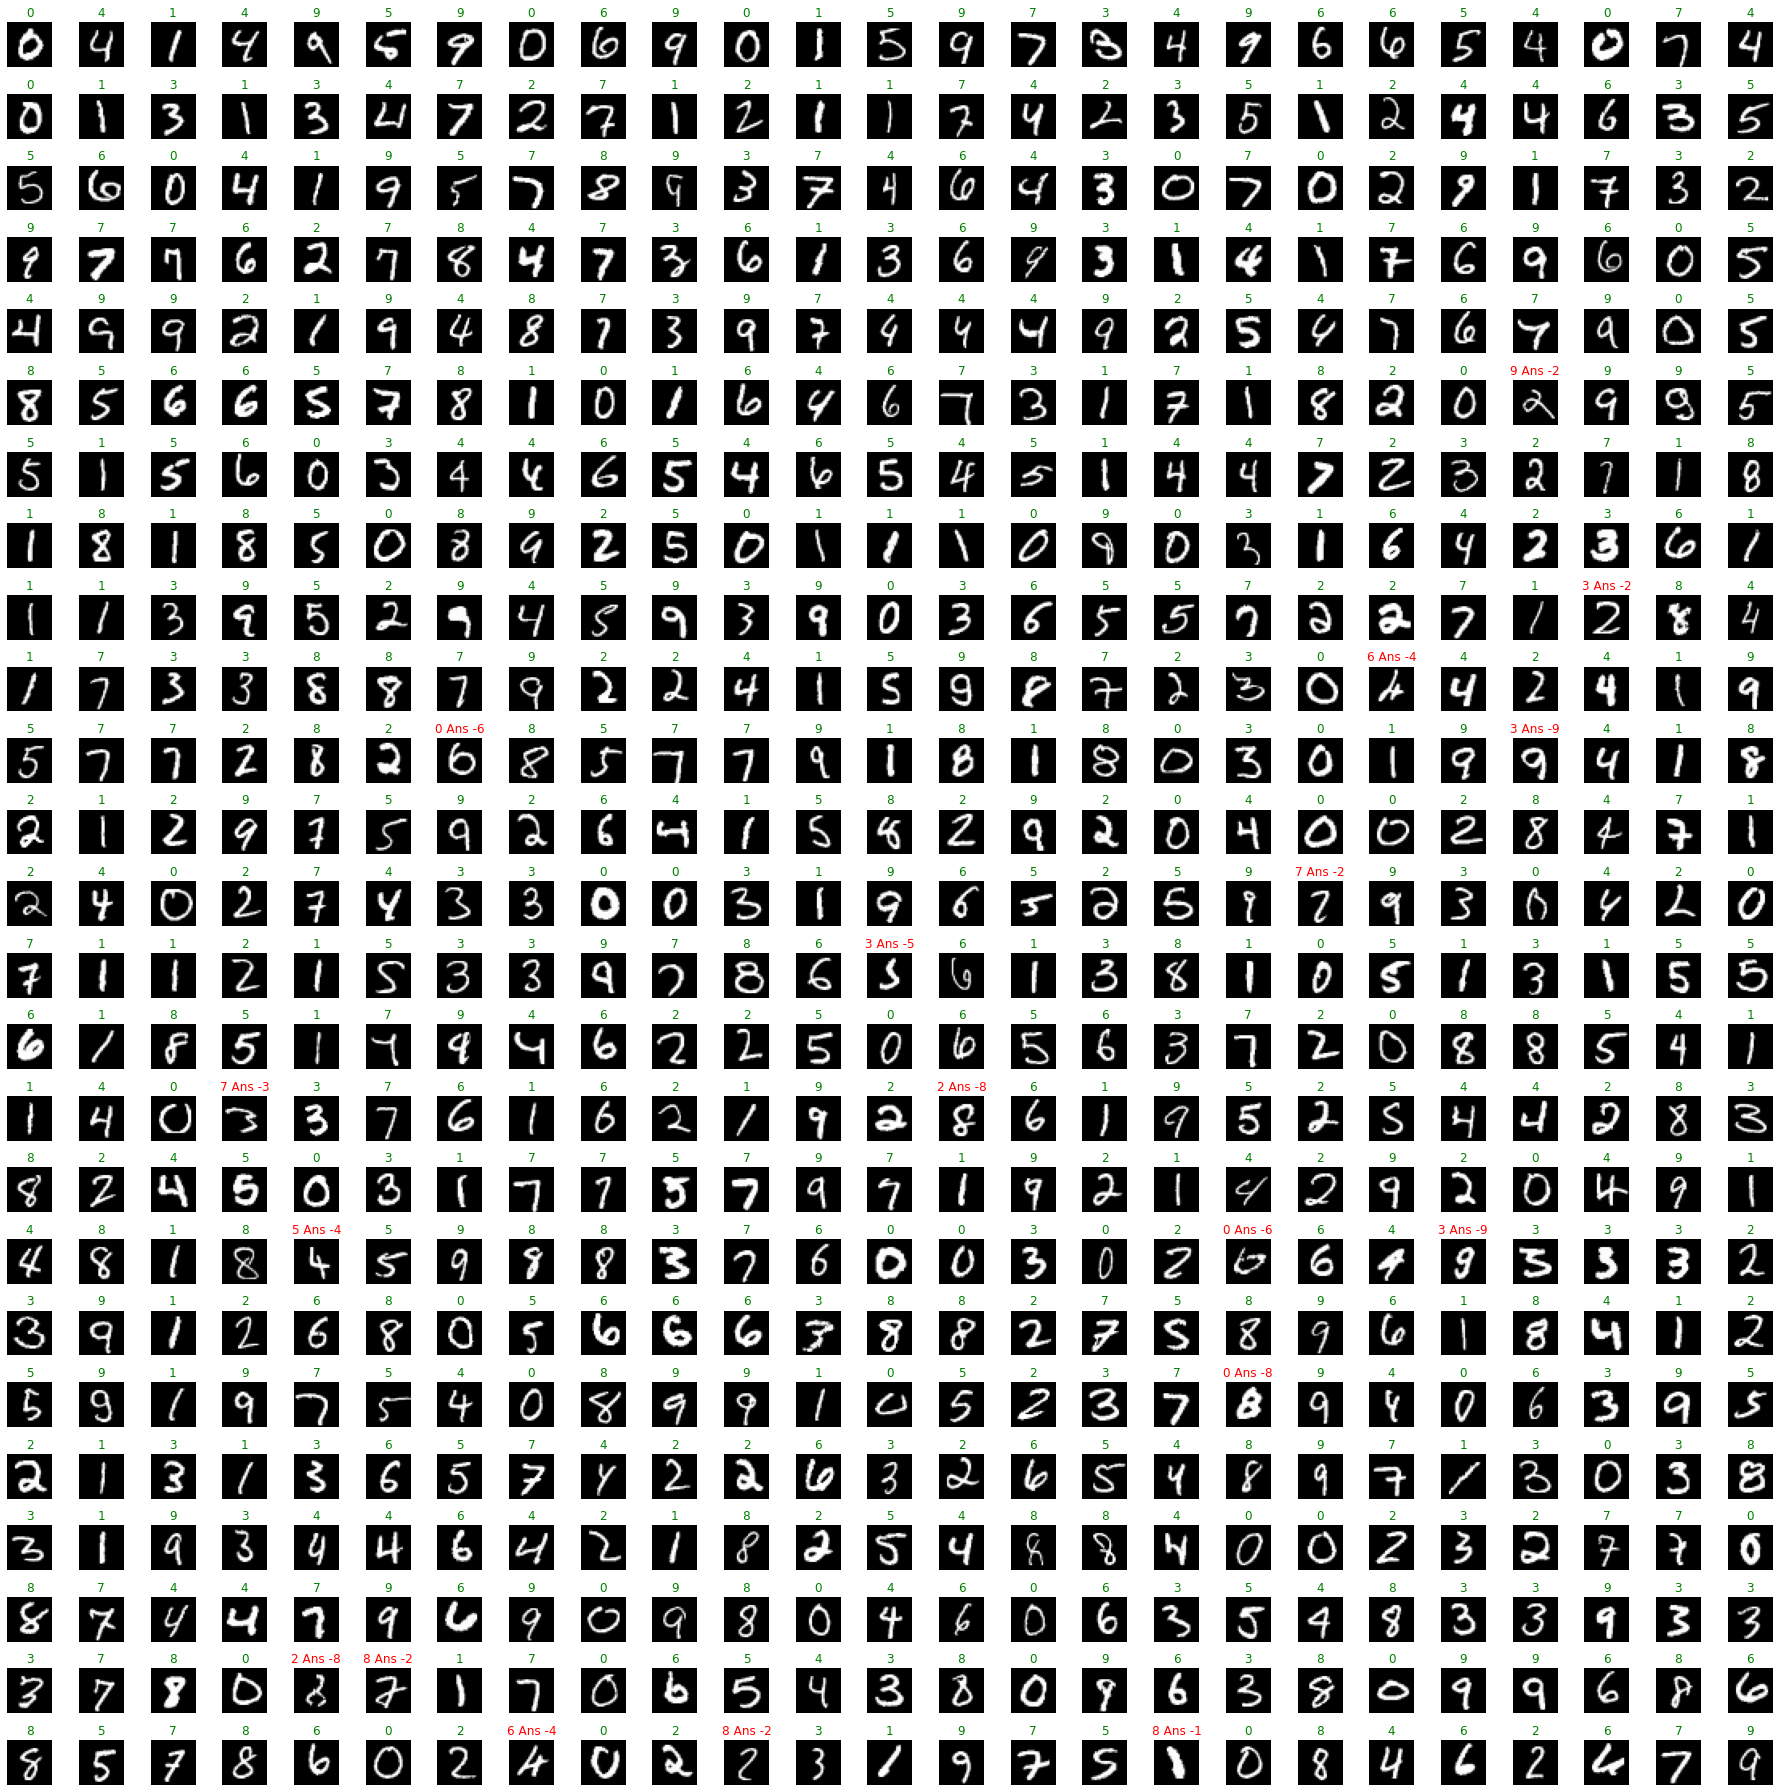

In [193]:
fig , ax = plt.subplots(25,25,figsize=(25,25))
k=3
for i in range(25):
  for j in range(25):
    ax[i,j].imshow(X_test_Normalized[k],cmap='gray')
    ax[i,j].axis('off')
    guessed = valuedef(X_test_Normalized_1D[k])
    if y_test[k] == guessed:
      ax[i,j].set_title(guessed,color='green')
    else:
      a = str(guessed) +" Ans -" + str(y_test[k])
      ax[i,j].set_title(a,color='red')
    k+=1
fig.tight_layout()

Text(0.5, 1.0, 'CNN on MNIST DATASET')

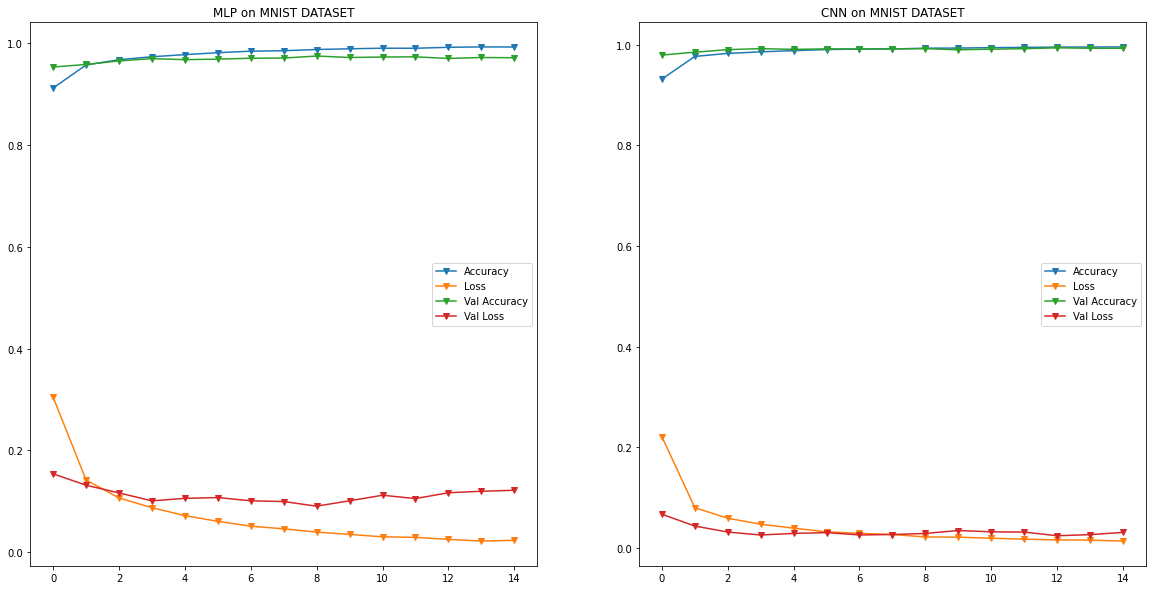

In [197]:
fig , (ax1,ax2) = plt.subplots(nrows=1,
                        ncols=2,
                        figsize=(20,10))

ax1.plot(hist_mlp.history['accuracy'],label='Accuracy',marker='v')
ax1.plot(hist_mlp.history['loss'],label='Loss',marker='v')
ax1.plot(hist_mlp.history['val_accuracy'],label='Val Accuracy',marker='v')
ax1.plot(hist_mlp.history['val_loss'],label='Val Loss',marker='v')
ax1.legend()
ax1.set_title('MLP on MNIST DATASET')

ax2.plot(hist_cnn1.history['accuracy'],label='Accuracy',marker='v')
ax2.plot(hist_cnn1.history['loss'],label='Loss',marker='v')
ax2.plot(hist_cnn1.history['val_accuracy'],label='Val Accuracy',marker='v')
ax2.plot(hist_cnn1.history['val_loss'],label='Val Loss',marker='v')
ax2.legend()

ax2.set_title('CNN on MNIST DATASET')

